# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import matplotlib.pyplot as plt
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?q="
appid = "&appid="
city_df = []

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# loop thru (cities) and print each name/id
counter = 1

country= []
cityn = []
lats = []
lngs = []
temps = []
max_temps = []
humidities = []
clouds = []
winds = []

for cityname in cities:
    if counter < 500:
        try:
            query_url = url + cityname + appid + weather_api_key
            city_request = requests.get(query_url).json()
            city_name = city_request['name']
            city_lat = city_request['coord']['lat']
            city_long = city_request['coord']['lon']
            city_temp = city_request['main']['temp']
            city_max = city_request['main']['temp_max']
            city_hum = city_request['main']['humidity']
            city_cloud = city_request['clouds']['all']
            city_wind = city_request['wind']['speed']
            # get country info
            country_info = city_request['sys']['country']
            # append city name
            cityn.append(city_name)
            # append country info
            country.append(country_info)
            lats.append(city_lat)
            lngs.append(city_long)
            temps.append(city_temp)
            max_temps.append(city_max)
            humidities.append(city_hum)
            clouds.append(city_cloud)
            winds.append(city_wind)
            print("city name is " + str(city_name) + " and the position is: " + str(counter))
            counter = counter + 1
        except:
            break

city name is Rikitea and the position is: 1
city name is Madimba and the position is: 2
city name is Iranshahr and the position is: 3
city name is Tiksi and the position is: 4
city name is Carballo and the position is: 5
city name is Nikolskoye and the position is: 6
city name is Hambantota and the position is: 7
city name is Touros and the position is: 8
city name is Qaanaaq and the position is: 9
city name is Hobart and the position is: 10


In [4]:
lats

[-23.1203,
 -10.4,
 27.2025,
 71.6872,
 43.213,
 59.7035,
 6.1241,
 -5.1989,
 77.484,
 -42.8794]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# api call template: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#sample call for city yellowknife

#.append not adding
#no .append results in single float point

city_df = []

        

city_df = {
    'country' : country,
           'cityn' : cityn,
    'lats' : lats,
    'lngs' : lngs,
    "temps" : temps,
    'max_temps' : max_temps,
    'humidities' : humidities,
    'clouds' : clouds,
    'winds' : winds
               
} 
city_df





{'country': ['PF', 'TZ', 'IR', 'RU', 'ES', 'RU', 'LK', 'BR', 'GL', 'AU'],
 'cityn': ['Rikitea',
  'Madimba',
  'Iranshahr',
  'Tiksi',
  'Carballo',
  'Nikolskoye',
  'Hambantota',
  'Touros',
  'Qaanaaq',
  'Hobart'],
 'lats': [-23.1203,
  -10.4,
  27.2025,
  71.6872,
  43.213,
  59.7035,
  6.1241,
  -5.1989,
  77.484,
  -42.8794],
 'lngs': [-134.9692,
  40.3333,
  60.6848,
  128.8694,
  -8.691,
  30.7861,
  81.1185,
  -35.4608,
  -69.3632,
  147.3294],
 'temps': [299.63,
  300.21,
  285.15,
  245.2,
  286.39,
  253.61,
  300.15,
  300.15,
  257.29,
  290.64],
 'max_temps': [299.63,
  300.21,
  285.15,
  245.2,
  288.15,
  255.37,
  300.15,
  300.15,
  257.29,
  292.04],
 'humidities': [77, 86, 15, 88, 55, 77, 94, 78, 88, 67],
 'clouds': [76, 100, 0, 100, 0, 40, 20, 75, 100, 75],
 'winds': [7.2, 5.88, 4.12, 2.32, 5.66, 4, 4.12, 4.12, 1.26, 3.6]}

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#convet to df
cities_df = pd.DataFrame(city_df)

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:


#export to csv 
cities_df.to_csv("../output_data/cities.csv")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [57]:
cities_df["latn"] = np.where(cities_df.lats > 0, cities_df.lats, 0)
cities_df["lats"] = np.where(cities_df.lats < 0, - cities_df.lats, 0) 


cities_df.plot.scatter(x='lats', y='temps' )



ValueError: either both or neither of x and y should be given

## Latitude vs. Humidity Plot

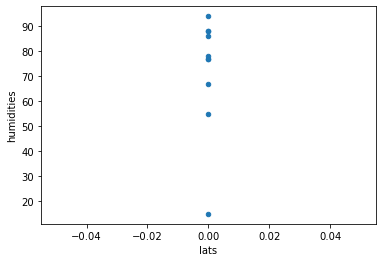

In [24]:
cities_df.plot.scatter(x='lats', y='humidities' )
#AxesSubplot:xlabel='Latitude', ylabel='Humidity'
    

## Latitude vs. Cloudiness Plot

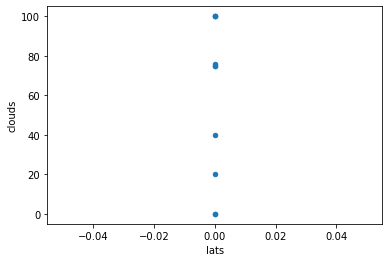

In [26]:
cities_df.plot.scatter(x='lats', y='clouds' )
#AxesSubplot:xlabel='Latitude', ylabel='Cloudiness'

## Latitude vs. Wind Speed Plot

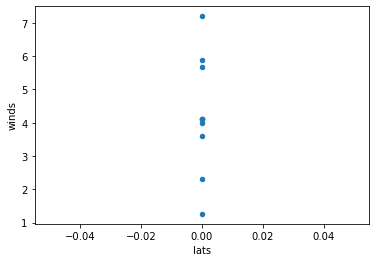

In [28]:
cities_df.plot.scatter(x='lats', y='winds' )
#AxesSubplot:xlabel='Latitude', ylabel='Wind Speed'

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation coefficient is 0.0


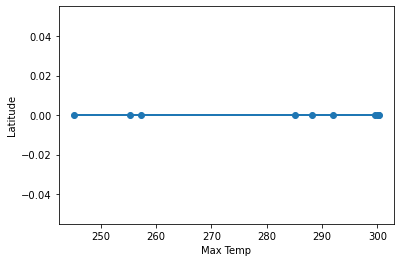

In [48]:
x_value = cities_df['max_temps']
y_value = cities_df['latn'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the correlation coefficient is 0.0


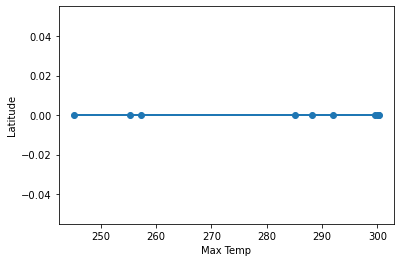

In [50]:
x_value = cities_df['max_temps']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation coefficient is 0.0


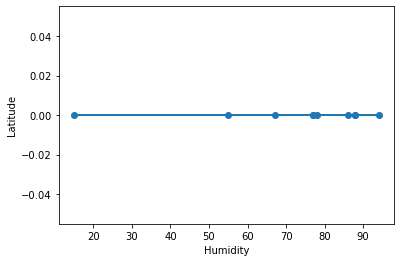

In [52]:
x_value = cities_df['humidities']
y_value = cities_df['latn'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the correlation coefficient is 0.0


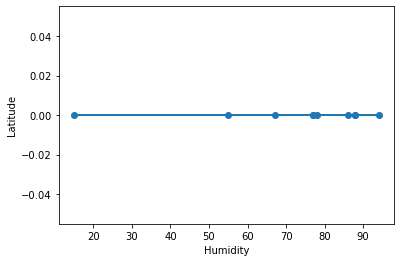

In [53]:
x_value = cities_df['humidities']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the correlation coefficient is 0.0


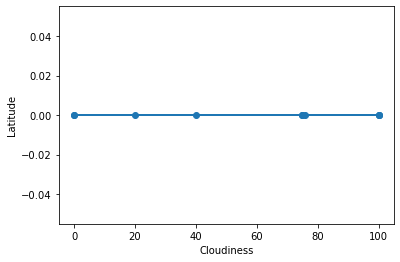

In [54]:
x_value = cities_df['clouds']
y_value = cities_df['latn'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_value = cities_df['clouds']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the correlation coefficient is 0.0


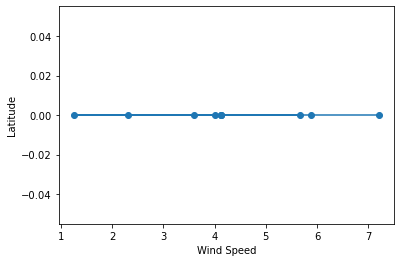

In [55]:
x_value = cities_df['winds']
y_value = cities_df['latn'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_value = cities_df['winds']
y_value = cities_df['lats'] 
                       
(slope, intercept, rvalue, pvalue, std)= linregress(x_value, y_value)
regress_value =  x_value * slope + intercept   
line_eq = "y= " + str(slope) + "x " + str(intercept)
plt.scatter(x_value, y_value)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.plot(x_value, regress_value)
print("the correlation coefficient is " + str(rvalue))
#print("the r squared value is " + str(rvalue**2))
plt.show()